In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
#bayes Throem 
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

<AxesSubplot:>

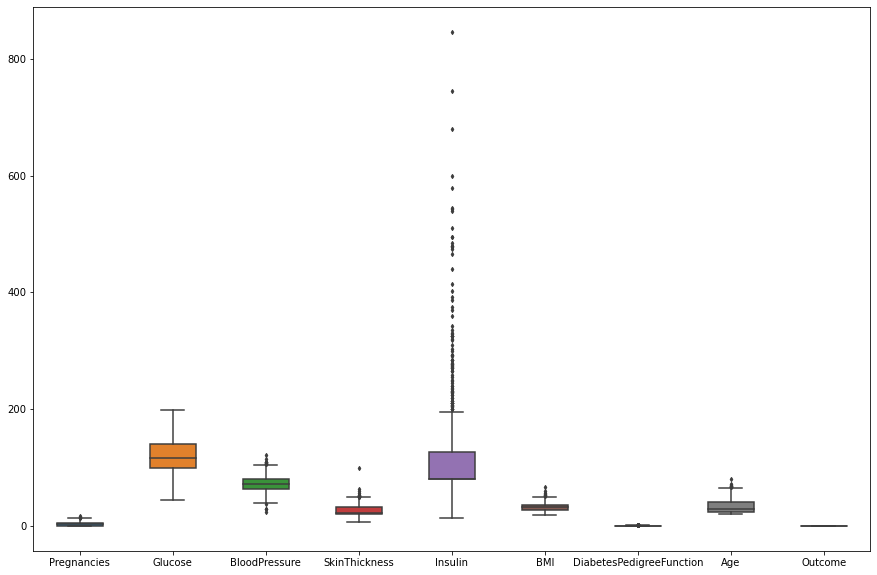

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [11]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [12]:
train_size = int(0.8 * len(data))
train_set = data[:train_size]
test_set = data[train_size:].reset_index(drop=True)
actual = test_set['Outcome']


In [13]:
means = train_set.groupby('Outcome').mean()
stds = train_set.groupby('Outcome').std()

In [14]:
priors = train_set['Outcome'].value_counts(normalize=True)

In [15]:
import math
def gaussian_prob(x, mean, std):
    exponent = math.exp(-((x - mean)**2 / (2 * std**2)))
    return (1 / (math.sqrt(2 * math.pi) * std)) * exponent

In [16]:
def predict_class(row):
    # Calculate the posterior probabilities for each class
    posteriors = {}
    for class_val in priors.index:
        posterior = priors[class_val]
        for feature in means.columns:
            mean = means.loc[class_val, feature]
            std = stds.loc[class_val, feature]
            x = row[feature]
            likelihood = gaussian_prob(x, mean, std)
            posterior *= likelihood
        posteriors[class_val] = posterior
    # Return the class with the highest posterior probability
    return max(posteriors, key=posteriors.get)

In [17]:
predictions = []
for index, row in test_set.iterrows():
    predictions.append(predict_class(row))

In [18]:
predictions

[1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0]

In [19]:
actual = test_set['Outcome']
correct = 0
for i in range(len(actual)):
    if actual[i] == predictions[i]:
        correct += 1
accuracy = correct / len(actual)
print('Accuracy:', accuracy)

Accuracy: 0.7402597402597403


In [22]:
from sklearn.metrics import classification_report,r2_score,mean_absolute_error

In [21]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        99
           1       0.67      0.55      0.60        55

    accuracy                           0.74       154
   macro avg       0.72      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



In [24]:
print(mean_absolute_error(actual,predictions))

0.2597402597402597
